In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\12403\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [14]:
class ReLU_network():
    def __init__(self, x,y):
        self.inputLayerSize = 1
        self.hiddenLayerSize = 3
        self.outputLayerSize = 1
        
        self.input = x
        self.y = y
        
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.inputLayerSize)
        
        self.B1 = np.random.randn()
        self.B2 = np.random.randn()
        
    def ReLU(self, Z):
        return np.maximum(Z, 0)
    
    def Feedforward(self, X):
        #Input to Hidden Layer
        self.z1 = np.dot(X, self.W1) + self.B1
        self.a1 = self.ReLU(self.z1)
        
        #Hidden Layer to Output
        self.z2 = np.dot(self.a1, self.W2) + self.B2
        self.a2 = self.ReLU(self.z2)
        return self.a2
    
    def dReLU(self, Z):
        return 1.* (x>0)
    
    def costFunction(self, X):
        self.a2 = self.Feedforward(X)
        Cost = 0.5*sum((self.y - self.a2)**2)
        return Cost
    
    
    def deltaCost(self):
        self.a2 = self.Feedforward(self.input)
        
        delta2 = np.multiply(-(self.y - self.a2), self.dReLU(self.z2))
        dJ_dW2 = np.dot(self.a1.T, delta2)
        
        dJ_B2 = np.sum(delta2)
        
        delta1 = np.dot(delta2, self.W2.T)*self.dReLU(self.z1)
        dJ_dW1 = np.dot(self.input.T, delta1)
        dJ_B1 = np.sum(delta1)
        
        return dJ_dW1, dJ_B1, dJ_dW2, dJ_B2
    
    def UpdateParameters(self, dJ_dW1, dJ_B1, dJ_dW2, dJ_B2):
        self.W2 = self.W2 - (alpha*dJ_dW2)
        self.B2 = self.B2 - (alpha*dJ_B2)
        
        self.W1 = self.W1 - (alpha*dJ_dW1)
        self.B1 = self.B1 - (alpha*dJ_B1)
               

In [15]:
def GenerateTestData(Size):
    x = np.linspace(-np.pi, (np.pi*5), Size).reshape(Size, 1)
    y = np.sin(x)
    return x, y
    

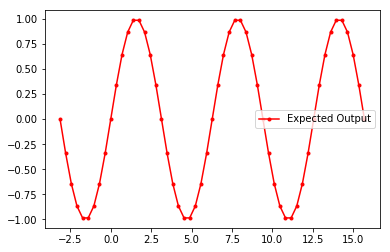

In [16]:
x,y = GenerateTestData(55)
plot(x,y, color = 'red', marker = ".")
legend(["Expected Output"])

In [17]:
NN = ReLU_network(x,y)

In [18]:
Output = NN.Feedforward(x)

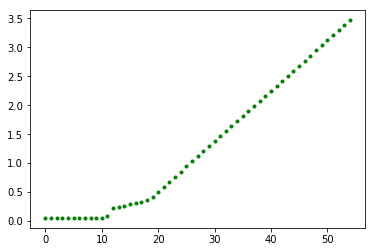

In [19]:
# print(Output)
plot(Output, '.', color = "green")

In [20]:
cost = NN.costFunction(x)
print(cost)

86.67750481727117


12.949254849172808


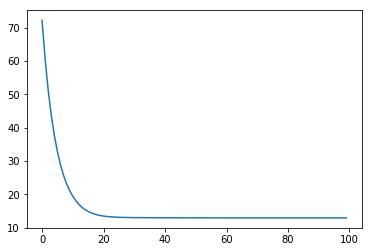

In [21]:
NumOfIterations = 100
alpha = 0.00001
CostTracker = np.zeros(NumOfIterations)
for i in range(NumOfIterations):
    dJ_dW1, dJ_B1, dJ_dW2, dJ_B2 = NN.deltaCost()
    NN.UpdateParameters(dJ_dW1, dJ_B1, dJ_dW2, dJ_B2)
    Output_New = NN.Feedforward(x)
    CostTracker[i] = NN.costFunction(x)

plot(CostTracker)
print(CostTracker[NumOfIterations-1])

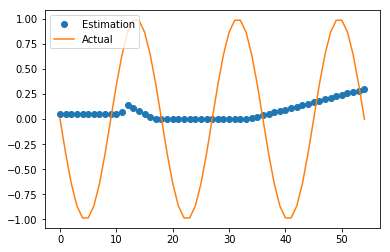

In [22]:
plot(Output_New, 'o')
plot(y)
legend(["Estimation", "Actual"])